## Plot notebook 

In [1]:
import numpy as np 
import math 
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits import mplot3d
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

### Uniform distribution



In [2]:
n = 1000000
(x,y,z) = np.random.uniform(0,1,(3,n))

#### Three dimensional representation  

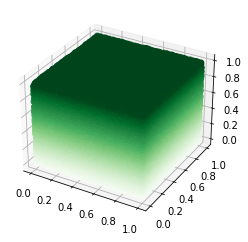

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens');

In [4]:
d = 0
u = 0.01

In [5]:
data = np.stack((x, y, z), axis=-1)
tranche_1 = data[(data[:,0]>= d) & (data[:,0]<u)]
#x = tranche_1[:,0]
#y = tranche_1[:,1]
#z = tranche_1[:,2]

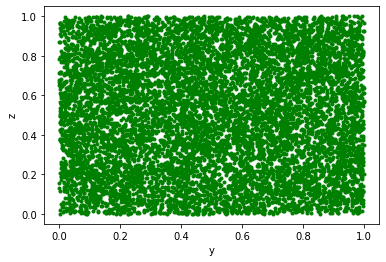

In [6]:
plt.plot(tranche_1[:,1],tranche_1[:,2], '.', color = 'green')
plt.xlabel('y')
plt.ylabel('z')
#ax.set_aspect('equal', adjustable='box')
plt.savefig("uniform_box_x_0_0_1.pdf")

#### distribution function

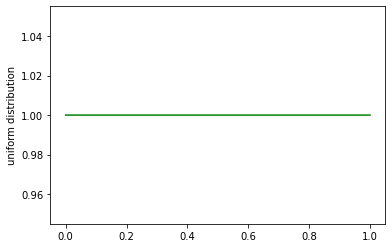

In [20]:
x = np.linspace(0,1, 10000)
y = stats.uniform.pdf(x, loc=0, scale=1)

plt.plot(x,y,color='green')
plt.ylabel('uniform distribution')
plt.savefig("uniform_pdf.pdf")

### Gaussian distribution truncated to [0,1]

In [8]:
lower, upper = 0, 1
mu, sigma = 0.5, 0.2

x_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
y_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
z_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)

#### Three dimensional representation  

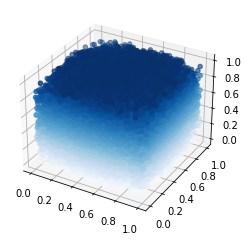

In [9]:
figG = plt.figure()
axG = plt.axes(projection='3d')
axG.scatter3D(x_norm, y_norm, z_norm, c=z_norm, cmap='Blues');

In [10]:
data_norm = np.stack((x_norm, y_norm, z_norm), axis=-1)
tranche_norm = data_norm[(data_norm[:,0]>= 0) & (data_norm[:,0]<0.1)]
#x = tranche_1[:,0]
#y = tranche_1[:,1]
#z = tranche_1[:,2]

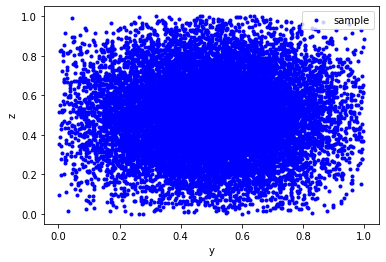

In [11]:
plt.figure()
plt.plot(tranche_norm[:,1],tranche_norm[:,2], '.', color = 'blue', label = 'sample')
plt.xlabel('y')
plt.ylabel('z')
#ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.savefig("normal_box.pdf")

#### Distribution function 

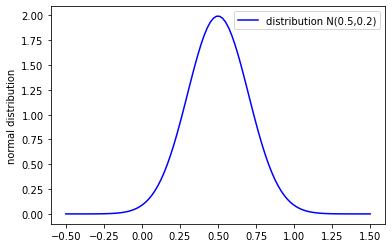

In [12]:
x_min = -0.5
x_max = 1.5

mean = 0.5
std = 0.2

x = np.linspace(x_min, x_max, 100)

y = stats.norm.pdf(x,mean,std)

plt.plot(x,y,color='blue', label = 'distribution N(0.5,0.2)')
plt.ylabel('normal distribution')
plt.legend()
plt.savefig("normal_pdf.pdf")

### Log-normal distribution truncated to [0,1]

In [13]:
sig = 0.35
s = 0.38

x_lognorm = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)
y_lognorm = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)
z_lognorm = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)


In [14]:
d = {'x': x_lognorm, 'y': y_lognorm, 'z' :z_lognorm}
df_log = pd.DataFrame(data=d)

#truncate 
df_log = df_log[(df_log['x']<= 1) & (df_log['y']<=1) & (df_log['z']<= 1)]

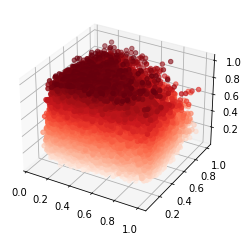

In [15]:
figL = plt.figure()
axL = plt.axes(projection='3d')
axL.scatter3D(df_log['x'],df_log['y'], df_log['z'], c=df_log['z'], cmap='Reds');

In [16]:
data_lognorm = np.stack((x_lognorm, y_lognorm, z_lognorm), axis=-1)
tranche_lognorm = data_lognorm[(data_lognorm[:,0]>= 0) & (data_lognorm[:,0]<0.2)]

In [17]:
tranche_lognorm

array([[0.18458333, 0.28513893, 0.39177554],
       [0.17627782, 0.52190739, 0.3643686 ],
       [0.1802186 , 0.187383  , 0.25759792],
       ...,
       [0.19003253, 0.36002179, 0.57638246],
       [0.19845401, 0.44513487, 0.35900327],
       [0.19356778, 0.29929437, 0.2924343 ]])

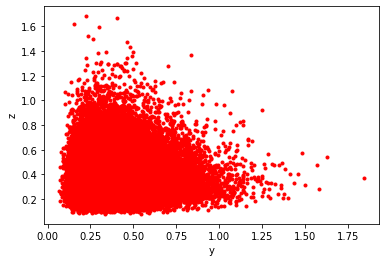

In [18]:
plt.figure()
plt.plot(tranche_lognorm[:,1],tranche_lognorm[:,2], '.', color = 'red')
plt.xlabel('y')
plt.ylabel('z')
#ax.set_aspect('equal', adjustable='box')
plt.savefig("lognormal_box_x_0_0_2.pdf")

#### Distribution function 

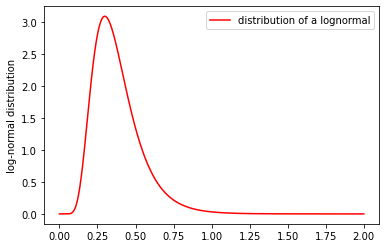

In [19]:
sig = 0.35
s = 0.4

x = np.linspace(0, 2, 10000)
y = stats.lognorm.pdf(x, s, loc=0, scale=sig)

plt.plot(x,y,color='red', label = 'distribution of a lognormal')
plt.ylabel('log-normal distribution')
plt.legend()
plt.savefig("log_normal_pdf.pdf")